# Media Coverage of the Isreal Palestine Conflict in May 2021

## An analysis of framing the conflict in US and UK media

### Outline

1. Obtaining data
2. Desciptive analysis of the coverage of the Israel-Palestine conflict
3. Framing of the conflict - a word-count approach

### 1. Obtaining data from the MediaCloud API

#### Initiate a client at Mediacloud

In [1]:
from dotenv import load_dotenv
load_dotenv()  # load config from .env file

True

In [2]:
import os, mediacloud.api
my_mc_api_key = 'bc00a1331e2f0dcaaf59ad7bd07a35bd094f332c8c7d1f3005dbc7002ea7bc3b' # read in API key
mc = mediacloud.api.MediaCloud(my_mc_api_key) # mc is my API client

#### Get stories from US and UK media in May 2021

In [3]:
# Specify the query
my_query = '"israel" and "palestine" and tags_id_media:34412234 or tags_id_media:8878466' # keywords and countries (US and UK)

# Specify the date
import datetime
start_date = datetime.date(2021,5,1)
end_date = datetime.date(2021,5,31)
date_range = mc.dates_as_query_clause(start_date, end_date)

# Count the number of stories available with the specified search parameters
print("Number of stories published including 'Israel' and 'Palestine' in the US or the UK in May 2021:",
      mc.storyCount(my_query, date_range)['count']) # function provided by MediaCloud for counting matching stories

Number of stories published including 'Israel' and 'Palestine' in the US or the UK in May 2021: 1538


In [4]:
# Get the stories
def all_matching_stories(mc_client, q, fq): # function provided by MediaCloud for getting all matching stories
    """
    Return all the stories matching a query within Media Cloud. Page through the results automatically.
    :param mc_client: a `mediacloud.api.MediaCloud` object instantiated with API key
    :param q: boolean query
    :param fq: date range query
    :return: a list of media cloud story items
    """
    last_id = 0
    more_stories = True
    stories = []
    while more_stories:
        page = mc_client.storyList(q, fq, last_processed_stories_id=last_id, rows=500, sort='processed_stories_id')
        print("  got one page with {} stories".format(len(page)))
        if len(page) == 0:
            more_stories = False
        else:
            stories += page
            last_id = page[-1]['processed_stories_id']
    return stories

stories = all_matching_stories(mc, my_query, date_range)

MCException: ('Error - got a HTTP status code of 504 with the message "Gateway Time-out", body: <html>\r\n<head><title>504 Gateway Time-out</title></head>\r\n<body>\r\n<center><h1>504 Gateway Time-out</h1></center>\r\n<hr><center>nginx</center>\r\n</body>\r\n</html>\r\n', 504)

In [ ]:
# Save the stories in a CSV file
import mediacloud.tags
for s in stories:
    theme_tag_names = ','.join([t['tag'] for t in s['story_tags'] if t['tag_sets_id'] == mediacloud.tags.TAG_SET_NYT_THEMES]) # assign a theme to each story
    s['themes'] = theme_tag_names
    
# write the CSV
import csv
fieldnames = ['stories_id', 'publish_date', 'title', 'url', 'language', 'ap_syndicated', 'themes', 'media_id', 'media_name', 'media_url']
with open('story-list.csv', 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames, extrasaction='ignore')
    writer.writeheader()
    for s in stories:
        try:
            writer.writerow(s)
        except:
            pass

In [5]:
# This is how the data looks in a pandas DataFrame
import pandas as pd
stories_df = pd.read_csv('story-list.csv') # this also serves as a check that saving the csv was successful
stories_df

,stories_id,publish_date,title,url,language,ap_syndicated,themes,media_id,media_name,media_url
0,1918491282,2021-05-01 04:00:00,Black-white-Asian relationships evolve in &#03...,https://www.ncronline.org/news/opinion/black-w...,en,False,NaN,33885,ncronline.org,http://ncronline.org#spider
1,1918808797,2021-05-01 22:29:18,"Napoleon's Mideast Campaign Still Contentious,...",https://www.ibtimes.com/napoleons-mideast-camp...,en,False,NaN,41550,IBTimes,http://www.ibtimes.com/
2,1918937749,2021-05-01 23:48:14,Democrats� False Middle East Mythology,https://spectator.org/biden-false-middle-east-...,en,False,NaN,21919,American Spectator,http://spectator.org
3,1919304595,2021-05-02 14:20:13,"Israel Reports Just 13 New Coronavirus Cases, ...",https://www.forbes.com/sites/jemimamcevoy/2021...,en,False,NaN,1104,Forbes,http://www.forbes.com/
4,1919351774,2021-05-02 15:42:19,"Months After Her Arrest Made Global Headlines,...",https://www.billboard.com/articles/news/dance/...,en,False,NaN,19194,Billboard,http://www.billboard.com
...,...,...,...,...,...,...,...,...,...,...
1551,1980827006,2021-05-15 00:00:00,Tensions Among Democrats Grow Over Israeli-Pal...,https://www.nytimes.com/2021/05/15/us/politics...,en,False,"politics and government,united states politics...",1,New York Times,http://nytimes.com
1552,1980827403,2021-05-15 00:00:00,Israel-Palestine is a State of Permanent Confl...,https://time.com/6048366/israel-palestine-conf...,en,False,quotation of the day,4419,Time,http://time.com
1553,1980827546,2021-05-12 04:10:39,CNN's Zakaria: Israel-Palestine Conflict Can o...,https://www.breitbart.com/clips/2021/05/11/cnn...,en,False,"politics and government,international relation...",19334,Breitbart,http://www.breitbart.com
1554,1980827617,2021-05-10 00:00:00,"Jerusalem violence leads to rockets, air strikes",https://www.reuters.com/world/asia-pacific/vio...,en,False,NaN,4442,Reuters,http://www.reuters.com


### 2. Descriptive analysis of the coverage of the Israel-Palestine conflict

#### Coverage over time

Text(0.5, 1.0, 'Number of stories about Israel and Palestine in the US and UK media - May 2021')

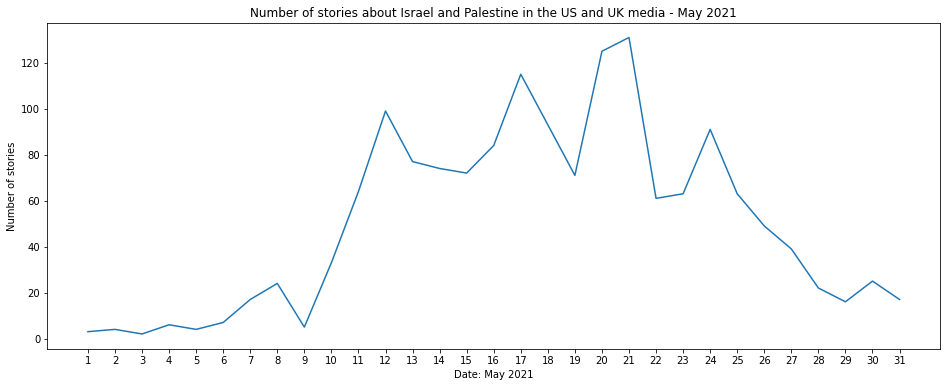

In [6]:
# Get the number of stories published each day
from collections import Counter
story_counter = Counter([date[:10] for date in stories_df.publish_date])

import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.plot(story_counter.keys(), story_counter.values())
plt.xticks(ticks = [i for i in range(31)],labels = [i for i in range(1,32)])
plt.xlabel("Date: May 2021")
plt.ylabel("Number of stories")
plt.title("Number of stories about Israel and Palestine in the US and UK media - May 2021")

#### Typical vocabulary of coverage

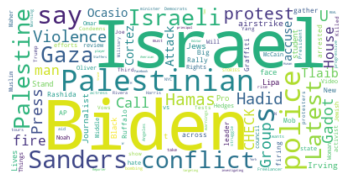

In [7]:
from wordcloud import WordCloud
text = " ".join(ttl.split()[1] for ttl in stories_df.title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
#plt.figure(figsize=(16,8))
plt.imshow(word_cloud, interpolation='bilinear', aspect='equal')
plt.axis("off")
plt.show()

### 3. Framing of the conflict - a word-count approach

#### Frequency of words

In [8]:
# Get the frequency of the 500 most frequently used words appearing in the articles (function from MediaCloud)
wordcount = mc.wordCount(my_query, date_range)
word_freq = {word['term']:word['count'] for word in wordcount} # save the output in a dictionary

In [9]:
word_freq

{'israel': 665,
 'israeli': 416,
 'palestinian': 370,
 'gaza': 177,
 'hamas': 125,
 'palestine': 119,
 'jerusalem': 86,
 'rockets': 78,
 'people': 77,
 'conflict': 77,
 'violence': 75,
 'forces': 72,
 'protesters': 70,
 'war': 67,
 'support': 67,
 'attacks': 66,
 'right': 65,
 'jewish': 62,
 'military': 61,
 'including': 60,
 'biden': 60,
 'group': 54,
 'fired': 54,
 'city': 53,
 'day': 51,
 'arab': 51,
 'killed': 50,
 'jews': 50,
 'east': 49,
 'police': 47,
 'called': 43,
 'week': 42,
 'reported': 42,
 'united': 40,
 'strip': 40,
 'time': 39,
 'security': 38,
 'president': 38,
 'militant': 38,
 'peace': 37,
 'minister': 37,
 'government': 37,
 'west': 35,
 'nations': 35,
 'lives': 35,
 'democratic': 34,
 'airstrikes': 34,
 'officials': 33,
 'new': 33,
 'political': 31,
 'defense': 31,
 'bank': 31,
 'critical': 30,
 'clashes': 30,
 'so': 29,
 'fighting': 29,
 'end': 29,
 'country': 29,
 'territory': 28,
 'children': 28,
 'american': 28,
 'prime': 27,
 'netanyahu': 27,
 'human': 27,
 'c

Text(0, 0.5, 'Number of times word used')

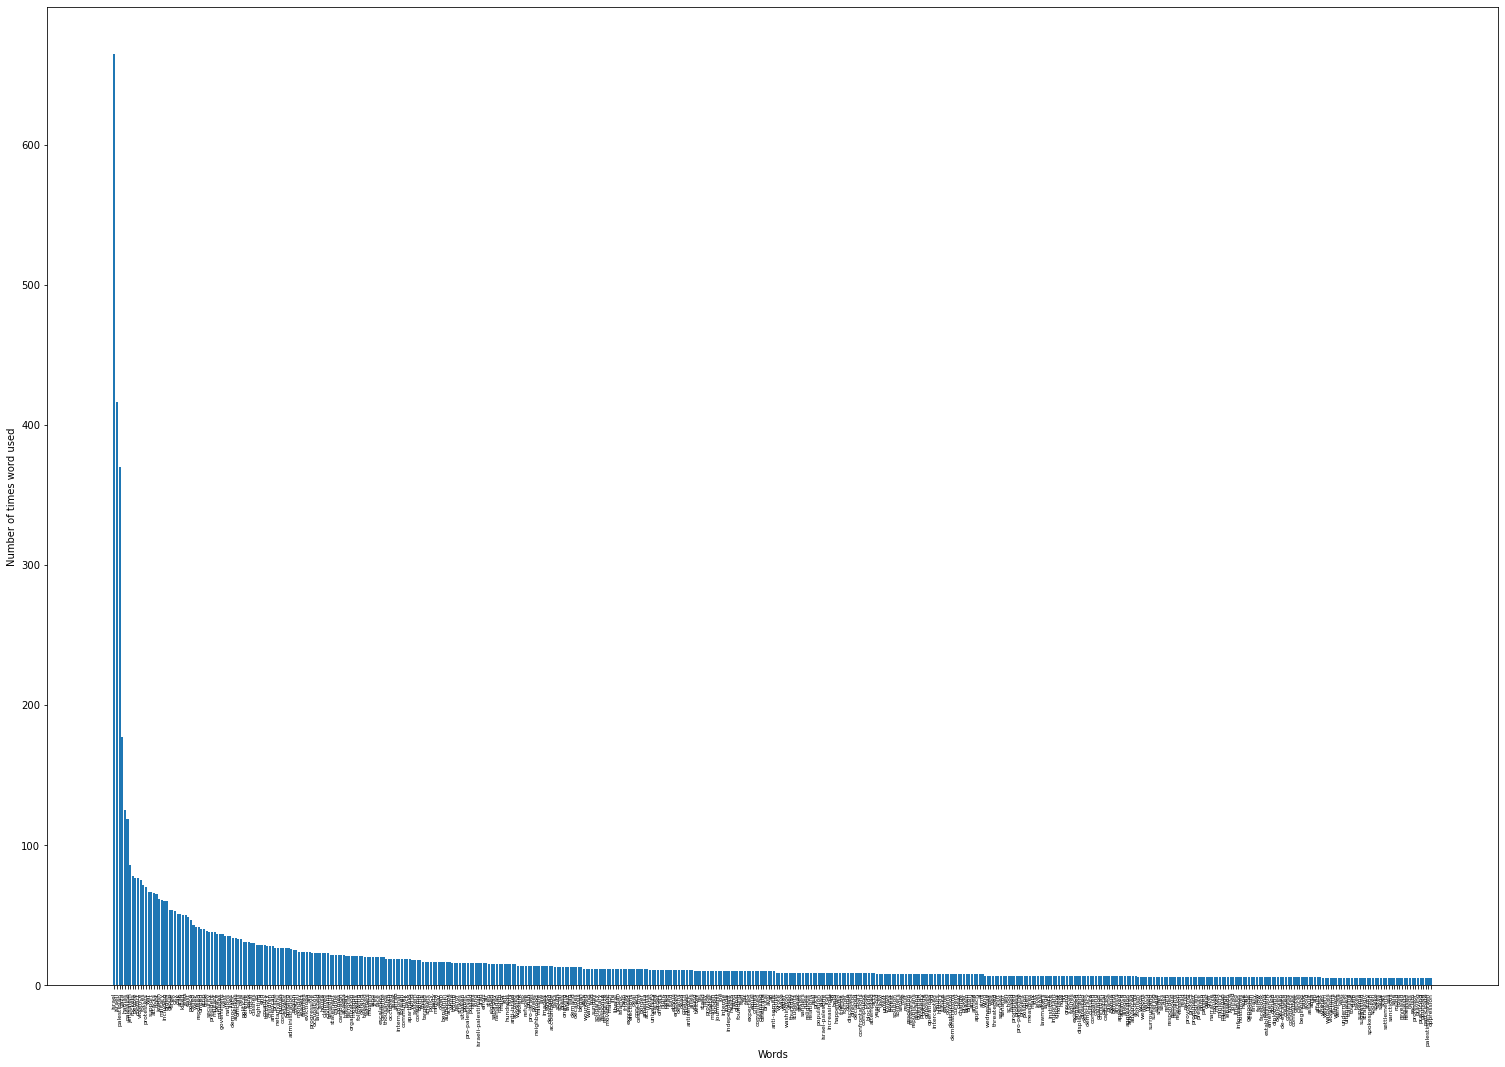

In [10]:
# Plot the frequency distribution of words to gain qualitative insight
plt.figure(figsize=(26,18))
plt.bar(word_freq.keys(), word_freq.values())
plt.xticks(rotation=90, fontsize = 6)
plt.xlabel("Words")
plt.ylabel("Number of times word used")

In [ ]:
# Plot the frequency distribution of the 10 most frequently used words
plt.figure(figsize=(26,18))
plt.bar(word_freq.keys()[:10], word_freq.values()[:10])
plt.xticks(rotation=90, fontsize = 6)
plt.xlabel("Words")
plt.ylabel("Number of times word used")

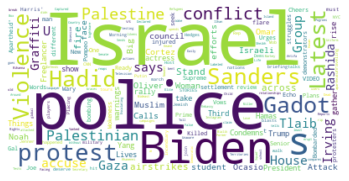

In [11]:
# Word cloud for the first half of May

half = int(1556/2)
text = " ".join(ttl.split()[1] for ttl in stories_df.head(half).title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# plt.figure(figsize=(8,8))
plt.imshow(word_cloud, interpolation='bilinear', aspect='equal')
plt.axis("off")
plt.show()

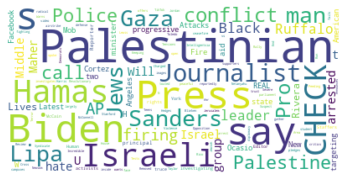

In [12]:
# Word cloud for the second half of May

half = int(1556/2)
text = " ".join(ttl.split()[1] for ttl in stories_df.tail(half).title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
#plt.figure(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear', aspect='equal')
plt.axis("off")
plt.show()

In [13]:
wordcount_by_date = {}

for i in range(1,31): # loop through each day
    start_date = datetime.date(2021,5,i)
    end_date = datetime.date(2021,5,i+1)
    date_range = mc.dates_as_query_clause(start_date, end_date)
    wordcount_d = mc.wordCount(my_query, date_range) # get the word count for the given day
    word_freq_d = {word['term']:word['count'] for word in wordcount_d} # save the output in a dictionary
    wordcount_by_date[i] = word_freq_d # append the obtained dictionary to a another, where the keys are days, values are word counts

In [14]:
# Get the number of neutral (and more extreme anti-Palestine) words used each day

neutral_w_by_day = {}

for day in wordcount_by_date:
    
    neutral_w_count = 0
    
    if 'dispute' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['dispute']
    if 'disputes' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['disputes']
    if 'disputed' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['disputed'] # for "disputed territories"     
    if 'contest' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['contest'] # for "contest grounds"
    if 'clash' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['clash']
    if 'clashes' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['clashes']   
    if 'terrorist' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['terrorist'] # anti-Palestine
    if 'terrorists' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['terrorists']
    if 'extremist' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['extremist'] # anti-Palestine
    if 'extremists' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['extremists']    

    neutral_w_by_day[day] = neutral_w_count
    
    
# Get the total number of words each day - to use for normalisation

w_by_day = {}

for day in wordcount_by_date:
    w_by_day[day] = sum(wordcount_by_date[day].values())
    
    
# Get normalised word count by dividing the number of "neutral" words by the number of all words that day

nw_prop = [nw / w for nw, w in zip(neutral_w_by_day.values(), w_by_day.values())]

Text(0.5, 1.0, "Trend of the use of 'pro-Israel' words in US and UK media - May 2021")

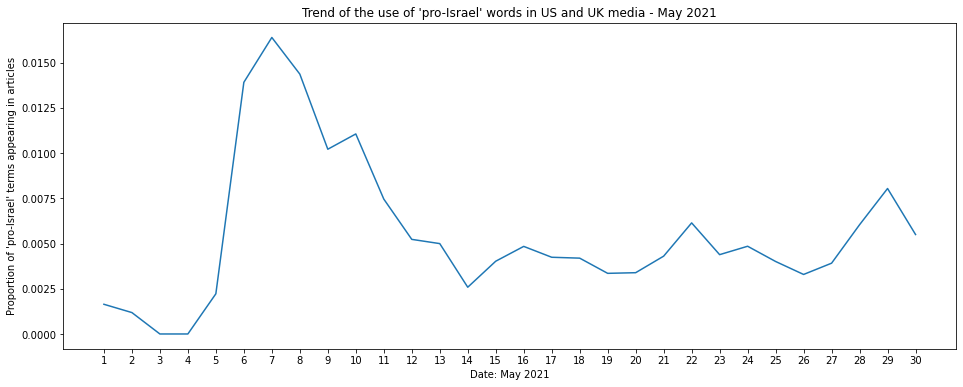

In [15]:
plt.figure(figsize=(16,6))
plt.plot(neutral_w_by_day.keys(), nw_prop)
plt.xticks(ticks = [i for i in range(1,31)],labels = [i for i in range(1,31)])
# plt.axvline(x = 9, color='r', label = "first voices of criticism")
plt.xlabel("Date: May 2021")
plt.ylabel("Proportion of 'pro-Israel' terms appearing in articles")
plt.title("Trend of the use of 'pro-Israel' words in US and UK media - May 2021")
# plt.legend()

In [16]:
# Get the number of neutral (and more extreme anti-Palestine) words used each day

pro_pal_w_by_day = {}

for day in wordcount_by_date:
    
    neutral_w_count = 0
    
    if 'discrimination' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['discrimination']
    if 'violence' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['violence']
    if 'bombing' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['bombing']
    if 'distruction' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['distruction']
    if 'displaced' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['displaced']
    if 'unprovoked' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['unprovoked']
    if 'attack' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['attack']
    if 'settlers' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['settlers']
    if 'settlment' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['settlment']
        
    pro_pal_w_by_day[day] = neutral_w_count
    
    
# Get the total number of words each day - to use for normalisation

#w_by_day = {}

#for day in wordcount_by_date:
 #   w_by_day[day] = sum(wordcount_by_date[day].values())
    
    
# Get normalised word count by dividing the number of "neutral" words by the number of all words that day

propal_w_prop = [nw / w for nw, w in zip(pro_pal_w_by_day.values(), w_by_day.values())]

Text(0.5, 1.0, "Trend of the use of 'pro-Palestine' words in US and UK media - May 2021")

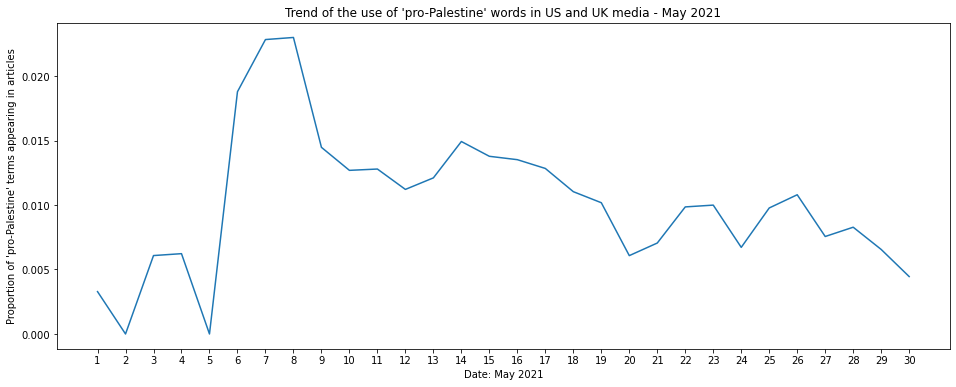

In [17]:
plt.figure(figsize=(16,6))
plt.plot(neutral_w_by_day.keys(), propal_w_prop)
plt.xticks(ticks = [i for i in range(1,31)],labels = [i for i in range(1,31)])
# plt.axvline(x = 9, color='r', label = "first voices of criticism")
plt.xlabel("Date: May 2021")
plt.ylabel("Proportion of 'pro-Palestine' terms appearing in articles")
plt.title("Trend of the use of 'pro-Palestine' words in US and UK media - May 2021")
# plt.legend()

__Topic modelling:__ which words are associated with one another?

C:\Users\Julcsi\anaconda3_2021_10_25\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\Julcsi\anaconda3_2021_10_25\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


topic 0: israel   palestine   conflict   biden   violence   hama   right   state   tlaib   joe
topic 1: �   gal   gadot   star   backlash   wonder   statement   woman   american   violence
topic 2: palestinian   israeli   police   jerusalem   conflict   violence   aqsa   clash   tension   mosque
topic 3: jewish   man   attack   crime   hate   antisemitic   mob   nyc   diner   family
topic 4: |   opinion   new   probe   punchless   fiasco   mask   san   international   letter
topic 5: pro   medium   tweet   social   palestinian   protester   post   journalist   palestine   rally
topic 6: east   middle   peace   middle east   biden   war   trump   land   scale   administration
topic 7: fire   cease   biden   house   white   group   muslim   minister   hamas   event
topic 8: gaza   airstrike   war   city   israel   major   conflict   hama   ceasefire   iran
topic 9: anti   semitic   semitism   israel   incident   jew   possible   graffiti   hate   protest


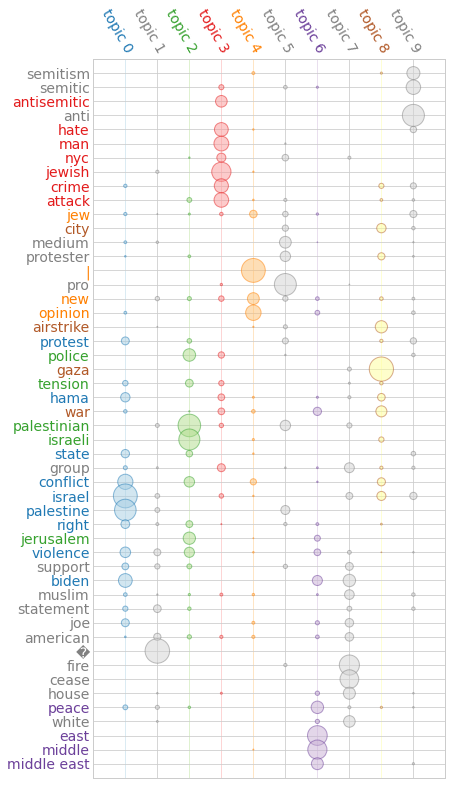

In [70]:
# get document-term-matrix with textacy
import textacy
from functools import partial

documents = list(stories_df['title'].str.lower()) # extract article titles

corpus = textacy.Corpus("en_core_web_sm",documents) # get the documents into corpus format

# from the corpus obtained above, extract ngrams and entities and save it in the docs_terms generator
docs_terms = (textacy.extract.terms(doc,
                                    ngs=partial(textacy.extract.ngrams, n=1, include_pos={"NOUN", "ADJ"}),
                                    ents=partial(textacy.extract.entities, include_types={ "ORG", "GPE", "LOC"})) for doc in corpus)

# from each doc in each corpus, turn the terms into strings and save them as the tokenized_docs generator
tokenized_docs = (textacy.extract.terms_to_strings(doc_terms, by="lemma") for doc_terms in docs_terms)

# build a document-term matrix from the tokenised docs
doc_term_matrix, vocab = textacy.representations.build_doc_term_matrix(tokenized_docs, tf_type="linear", idf_type="smooth")
id_to_term = {id_: term for term, id_ in vocab.items()}

# train the topic model using non-negative matrix factorization
import textacy.tm
model = textacy.tm.TopicModel("nmf", n_topics=10)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)

# look at the top terms for every topic
for topic_idx, terms in model.top_topic_terms(id_to_term, top_n=10):
    print(f"topic {topic_idx}: {'   '.join(terms)}")
    
# visualize this information
_ = model.termite_plot(doc_term_matrix, id_to_term, n_terms=50, highlight_topics=[0,2,3,4,6,8])

__Word clouds:__ Observe change in the use of words by quarter for deeper qualitative insight on why the use of all words selected as reflecting an obvious viewpoint of the publisher are decreasing

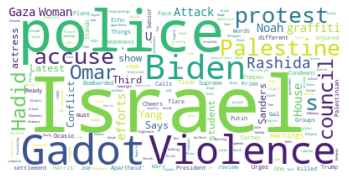

In [31]:
# Word cloud for the first quarter of May

quarter = int(1556/4)
text_1 = " ".join(ttl.split()[1] for ttl in stories_df.iloc[:quarter].title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text_1)
# plt.figure(figsize=(8,8))
plt.imshow(word_cloud, interpolation='bilinear', aspect='equal')
plt.axis("off")
plt.show()

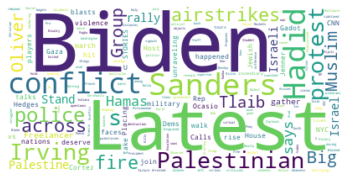

In [32]:
# Word cloud for the second quarter of May

quarter = int(1556/4)
half = int(1556/2)
text_2 = " ".join(ttl.split()[1] for ttl in stories_df.iloc[quarter:half].title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text_2)
# plt.figure(figsize=(8,8))
plt.imshow(word_cloud, interpolation='bilinear', aspect='equal')
plt.axis("off")
plt.show()

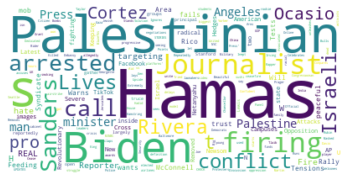

In [33]:
# Word cloud for the third quarter of May

text_3 = " ".join(ttl.split()[1] for ttl in stories_df.iloc[half:half+quarter].title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text_3)
# plt.figure(figsize=(8,8))
plt.imshow(word_cloud, interpolation='bilinear', aspect='equal')
plt.axis("off")
plt.show()

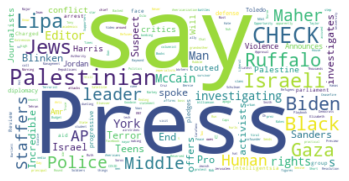

In [34]:
# Word cloud for the 4th quarter of May

text_4 = " ".join(ttl.split()[1] for ttl in stories_df.iloc[half+quarter:].title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text_4)
# plt.figure(figsize=(8,8))
plt.imshow(word_cloud, interpolation='bilinear', aspect='equal')
plt.axis("off")
plt.show()

#### Frequency of mention of entities

In [62]:
# let's which organizations are being mentioned most in stories about "israel"
import mediacloud.tags
entities = mc.storyTagCount(my_query, date_range, tag_sets_id=mediacloud.tags.TAG_SET_CLIFF_ORGS)

In [72]:
print("Frequency of appearance of entities across articles: \n")
for ent in entities:
    print(ent['description'] + ':', ent['count'])

Frequency of appearance of entities across articles: 

Hamas: 1002
Associated Press: 272
United Nations: 257
Congress: 214
Palestinian Authority: 206
White House: 202
AP: 173
New York Times: 143
State: 141
UN: 128
U.N.: 115
State Department: 112
IDF: 108
House: 104
CNN: 101
Senate: 93
Facebook: 88
European Union: 88
Al Jazeera: 88
Newsweek: 86
Islam: 73
Democratic Party: 72
 Council: 71
Fatah: 70
Fox News: 70
solidarity: 70
Washington Post: 62
Palestine Liberation Organization: 62
Islamic Jihad: 60
Reuters: 56
Foreign Ministry: 54
Supreme Court: 52
Knesset: 50
UNRWA: 48
PLO: 45
Hezbollah: 44
Gaza Health Ministry: 44
Muslim: 41
Security Council: 39
Human Rights Watch: 37
United Nations Security Council: 37
AIPAC: 37
U.S. State Department: 36
International Criminal Court: 36
GOP: 35
BDS: 34
Haaretz: 32
Israel Defense Forces: 32
UN Security Council: 31
Israeli army: 31
Stanford College Republicans: 31
MSNBC: 30
EU: 30
Trump administration: 28
Google: 28
YouTube: 28
ADL: 28
Instagram: 28
N